# Stock Price Prediction Using RNNs

## Objective
The objective of this assignment is to try and predict the stock prices using historical data from four companies IBM (IBM), Google (GOOGL), Amazon (AMZN), and Microsoft (MSFT).

We use four different companies because they belong to the same sector: Technology. Using data from all four companies may improve the performance of the model. This way, we can capture the broader market sentiment.

The problem statement for this assignment can be summarised as follows:

> Given the stock prices of Amazon, Google, IBM, and Microsoft for a set number of days, predict the stock price of these companies after that window.

## Business Value

Data related to stock markets lends itself well to modeling using RNNs due to its sequential nature. We can keep track of opening prices, closing prices, highest prices, and so on for a long period of time as these values are generated every working day. The patterns observed in this data can then be used to predict the future direction in which stock prices are expected to move. Analyzing this data can be interesting in itself, but it also has a financial incentive as accurate predictions can lead to massive profits.

### **Data Description**

You have been provided with four CSV files corresponding to four stocks: AMZN, GOOGL, IBM, and MSFT. The files contain historical data that were gathered from the websites of the stock markets where these companies are listed: NYSE and NASDAQ. The columns in all four files are identical. Let's take a look at them:

- `Date`: The values in this column specify the date on which the values were recorded. In all four files, the dates range from Jaunary 1, 2006 to January 1, 2018.

- `Open`: The values in this column specify the stock price on a given date when the stock market opens.

- `High`: The values in this column specify the highest stock price achieved by a stock on a given date.

- `Low`: The values in this column specify the lowest stock price achieved by a stock on a given date.

- `Close`: The values in this column specify the stock price on a given date when the stock market closes.

- `Volume`: The values in this column specify the total number of shares traded on a given date.

- `Name`: This column gives the official name of the stock as used in the stock market.

There are 3019 records in each data set. The file names are of the format `\<company_name>_stock_data.csv`.

## **1 Data Loading and Preparation** <font color =red> [25 marks] </font>

#### **Import Necessary Libraries**

In [1]:
import keras.layers

# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import tensorflow as tf
from keras.src.layers import TimeDistributed
from skimage.metrics import mean_squared_error

from sklearn.model_selection import train_test_split

### **1.1 Data Aggregation** <font color =red> [7 marks] </font>

As we are using the stock data for four different companies, we need to create a new DataFrame that contains the combined data from all four data frames. We will create a function that takes in a list of the file names for the four CSV files, and returns a single data frame. This function performs the following tasks:
- Extract stock names from file names
- Read the CSV files as data frames
- Append the stock names into the columns of their respective data frames
- Drop unnecessary columns
- Join the data frames into one.

#### **1.1.1** <font color =red> [5 marks] </font>
Create the function to join DataFrames and use it to combine the four datasets.

In [2]:
# Define a function to load data and aggregate them
df = pd.DataFrame()


def load_concat(path, list):
    df1 = pd.DataFrame()
    i = 0
    for file in file_list:
        df2 = pd.read_csv(path + "/" + file)
        df2 = df2.drop("Name", axis=1)
        df2.columns = df2.columns + list[i]
        i = i + 1
        df1 = pd.concat([df1, df2], axis=1)
    return df1

In [3]:
# Specify the names of the raw data files to be read and use the aggregation function to read the files
file_list = [
    "AMZN_stocks_data.csv",
    "GOOGL_stocks_data.csv",
    "IBM_stocks_data.csv",
    "MSFT_stocks_data.csv",
]
path = "."
list = ["_Amazon", "_Google", "_IBM", "_Microsoft"]
df = load_concat(path, list)

In [4]:
# View specifics of the data
from IPython.display import display

display(df.head())
display(df.info())
display(df.describe())

,Date_Amazon,Open_Amazon,High_Amazon,Low_Amazon,Close_Amazon,Volume_Amazon,Date_Google,Open_Google,High_Google,Low_Google,...,High_IBM,Low_IBM,Close_IBM,Volume_IBM,Date_Microsoft,Open_Microsoft,High_Microsoft,Low_Microsoft,Close_Microsoft,Volume_Microsoft
0,2006-01-03,47.47,47.85,46.25,47.58,7582127.0,2006-01-03,211.47,218.05,209.32,...,82.55,80.81,82.06,11715200,2006-01-03,26.25,27.00,26.10,26.84,79974418.0
1,2006-01-04,47.48,47.73,46.69,47.25,7440914.0,2006-01-04,222.17,224.70,220.09,...,82.50,81.33,81.95,9840600,2006-01-04,26.77,27.08,26.77,26.97,57975661.0
2,2006-01-05,47.16,48.20,47.11,47.65,5417258.0,2006-01-05,223.22,226.00,220.97,...,82.90,81.00,82.50,7213500,2006-01-05,26.96,27.13,26.91,26.99,48247610.0
3,2006-01-06,47.97,48.58,47.32,47.87,6154285.0,2006-01-06,228.66,235.49,226.85,...,85.03,83.41,84.95,8197400,2006-01-06,26.89,27.00,26.49,26.91,100969092.0
4,2006-01-09,46.55,47.10,46.40,47.08,8945056.0,2006-01-09,233.44,236.94,230.70,...,84.25,83.38,83.73,6858200,2006-01-09,26.93,27.07,26.76,26.86,55627836.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3020 entries, 0 to 3019
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date_Amazon       3019 non-null   object 
 1   Open_Amazon       3019 non-null   float64
 2   High_Amazon       3019 non-null   float64
 3   Low_Amazon        3019 non-null   float64
 4   Close_Amazon      3019 non-null   float64
 5   Volume_Amazon     3019 non-null   float64
 6   Date_Google       3019 non-null   object 
 7   Open_Google       3019 non-null   float64
 8   High_Google       3019 non-null   float64
 9   Low_Google        3019 non-null   float64
 10  Close_Google      3019 non-null   float64
 11  Volume_Google     3019 non-null   float64
 12  Date_IBM          3020 non-null   object 
 13  Open_IBM          3019 non-null   float64
 14  High_IBM          3020 non-null   float64
 15  Low_IBM           3019 non-null   float64
 16  Close_IBM         3020 non-null   float64


None

,Open_Amazon,High_Amazon,Low_Amazon,Close_Amazon,Volume_Amazon,Open_Google,High_Google,Low_Google,Close_Google,Volume_Google,Open_IBM,High_IBM,Low_IBM,Close_IBM,Volume_IBM,Open_Microsoft,High_Microsoft,Low_Microsoft,Close_Microsoft,Volume_Microsoft
count,3019.000000,3019.000000,3019.000000,3019.000000,3.019000e+03,3019.000000,3019.000000,3019.000000,3019.000000,3.019000e+03,3019.000000,3020.000000,3019.000000,3020.000000,3.020000e+03,3019.000000,3019.000000,3019.000000,3019.000000,3.019000e+03
mean,299.335310,302.371163,296.037695,299.376231,5.931712e+06,428.200802,431.835618,424.130275,428.044001,3.551504e+06,145.515545,146.681738,144.471597,145.617278,5.773301e+06,36.496817,36.827903,36.173190,36.513412,5.161762e+07
std,280.120547,281.826442,277.927134,279.980161,5.122034e+06,236.320026,237.514087,234.923747,236.343238,3.038599e+06,37.554946,37.613446,37.477641,37.529387,3.192831e+06,14.683337,14.742483,14.620057,14.694656,3.114958e+07
min,26.090000,26.300000,25.760000,26.070000,9.864350e+05,131.390000,134.820000,123.770000,128.850000,5.211410e+05,72.740000,73.940000,69.500000,71.740000,2.542560e+05,15.200000,15.620000,14.870000,15.150000,7.425603e+06
25%,81.175000,82.580000,79.725000,81.090000,3.137037e+06,247.775000,250.190000,244.035000,247.605000,1.760854e+06,116.405000,117.765000,115.490000,116.525000,3.622681e+06,26.785000,27.045000,26.535000,26.835000,3.136557e+07
50%,205.330000,208.000000,202.100000,205.440000,4.724100e+06,310.480000,312.810000,307.790000,310.080000,2.517630e+06,149.610000,150.330000,148.470000,149.315000,4.928852e+06,29.990000,30.230000,29.780000,30.000000,4.617529e+07
75%,375.570000,379.155000,373.000000,375.140000,7.135246e+06,572.140000,575.975000,565.900000,570.770000,4.242182e+06,178.445000,179.762500,177.330000,178.685000,6.965014e+06,44.545000,44.980000,44.090000,44.400000,6.322291e+07
max,1204.880000,1213.410000,1191.150000,1195.830000,1.044046e+08,1083.020000,1086.490000,1072.270000,1085.090000,4.118289e+07,215.380000,215.900000,214.300000,215.800000,3.077428e+07,87.120000,87.500000,86.230000,86.850000,5.910786e+08


#### **1.1.2** <font color =red> [2 marks] </font>
Identify and handle any missing values.

In [35]:
# Handle Missing Values

df.isna().sum()
list1 = []
list = df.columns
for l in list:
    if df[l].dtype == "object":
        list1.append(l)
print(list1)
for l in list1:
    df[l] = pd.DatetimeIndex(df[l])
list = list.drop(list1)
for l in list:
    a = ""
    if df[l].dtype in ["int", "float"]:
        a = df[l].mean()
    else:
        a = df[l].mode()
    df[l] = df[l].map(lambda x: a if np.isnan(x) else x)
df.isna().sum()

['Date_Amazon', 'Date_Google', 'Date_IBM', 'Date_Microsoft']


Date_Amazon         1
Open_Amazon         0
High_Amazon         0
Low_Amazon          0
Close_Amazon        0
Volume_Amazon       0
Date_Google         1
Open_Google         0
High_Google         0
Low_Google          0
Close_Google        0
Volume_Google       0
Date_IBM            0
Open_IBM            0
High_IBM            0
Low_IBM             0
Close_IBM           0
Volume_IBM          0
Date_Microsoft      1
Open_Microsoft      0
High_Microsoft      0
Low_Microsoft       0
Close_Microsoft     0
Volume_Microsoft    0
dtype: int64

### **1.2 Analysis and Visualisation** <font color =red> [5 marks] </font>

#### **1.2.1** <font color =red> [2 marks] </font>
Analyse the frequency distribution of stock volumes of the companies and also see how the volumes vary over time.

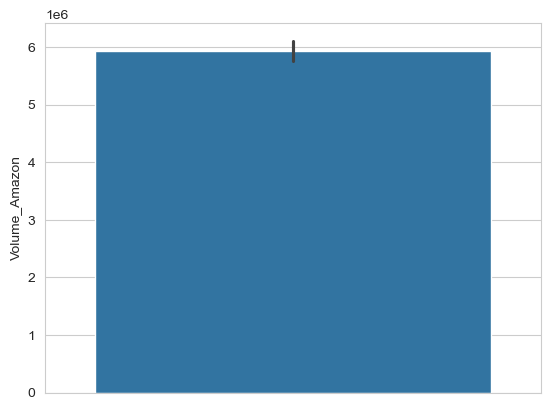

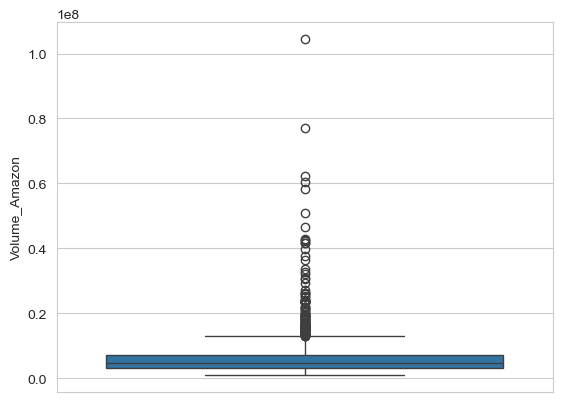

C:\Users\ak007\AppData\Local\Temp\ipykernel_27912\2642762352.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[l], bins = 10, kde = True)


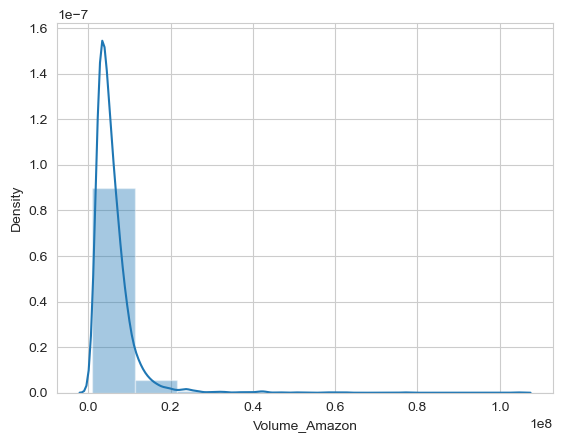

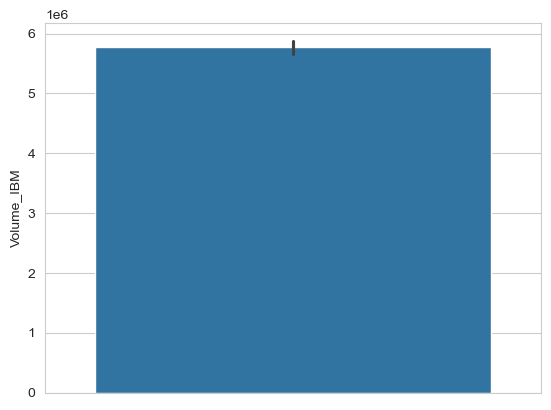

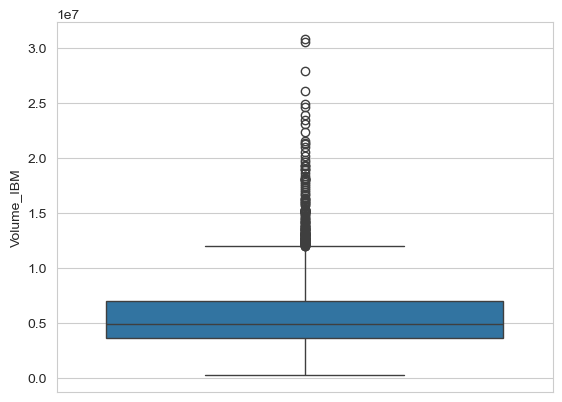

C:\Users\ak007\AppData\Local\Temp\ipykernel_27912\2642762352.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[l], bins = 10, kde = True)


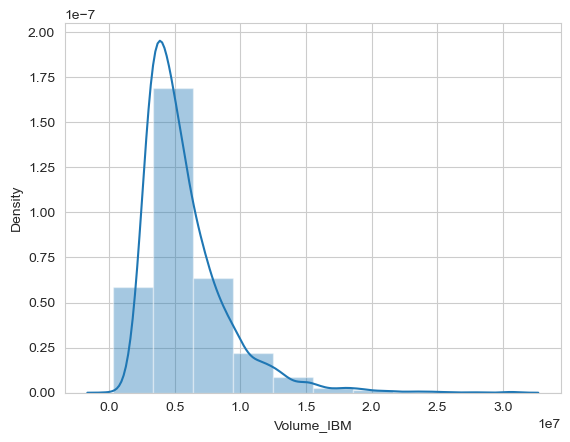

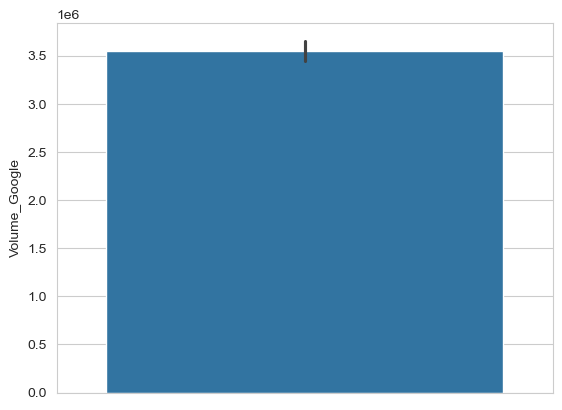

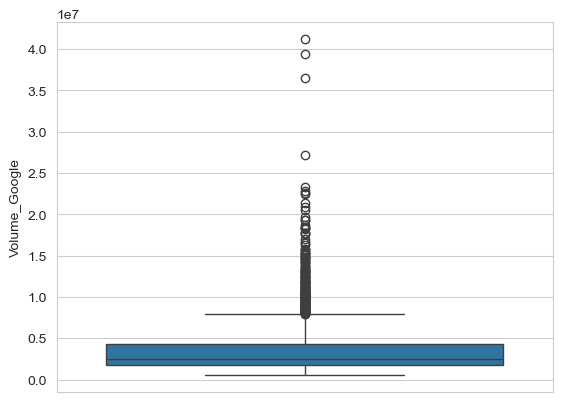

C:\Users\ak007\AppData\Local\Temp\ipykernel_27912\2642762352.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[l], bins = 10, kde = True)


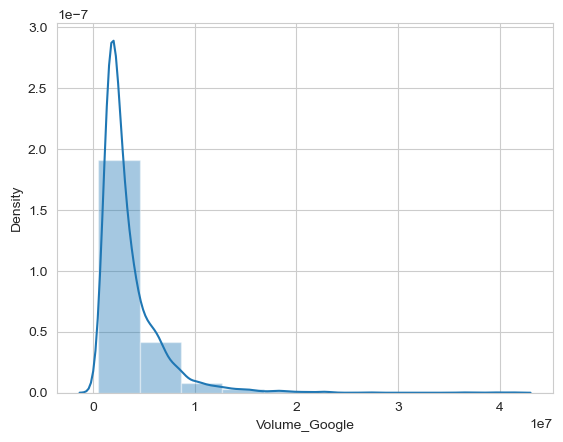

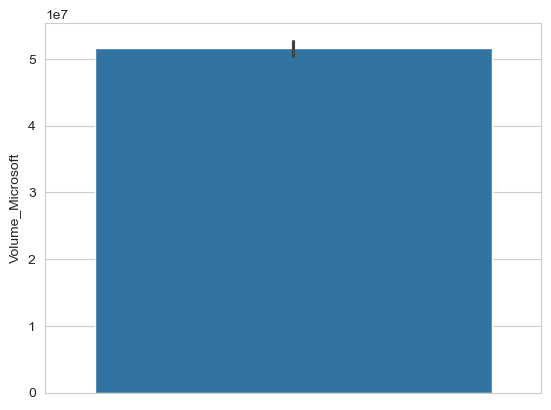

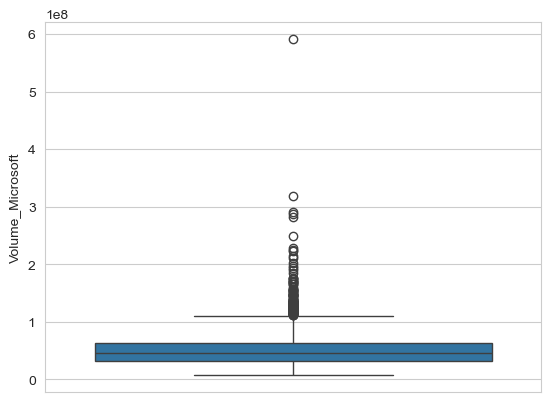

C:\Users\ak007\AppData\Local\Temp\ipykernel_27912\2642762352.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[l], bins = 10, kde = True)


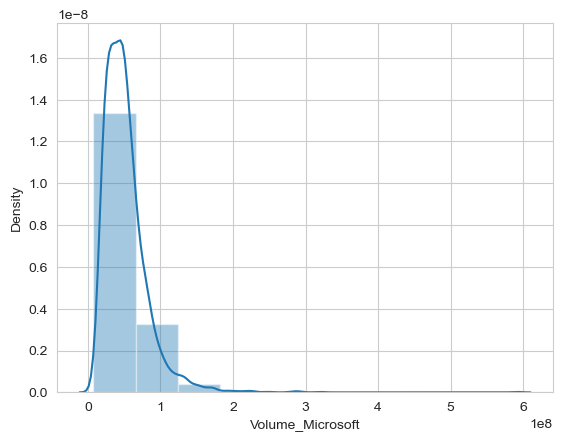

In [36]:
# Frequency distribution of volumes
list = ["Volume_Amazon", "Volume_IBM", "Volume_Google", "Volume_Microsoft"]
for l in list:
    sns.barplot(df, y=l)
    plt.show()
    sns.boxplot(data=df, y=l)
    plt.show()
    sns.distplot(df[l], bins=10, kde=True)
    plt.show()

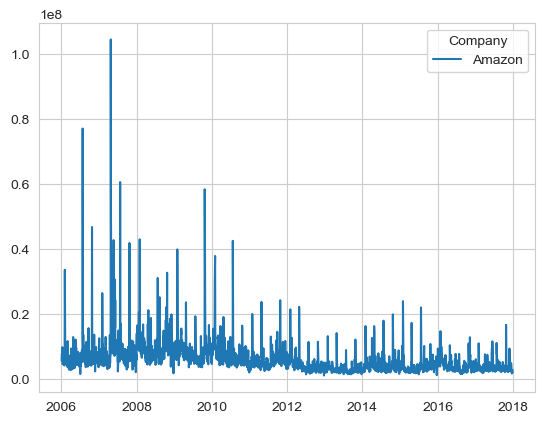

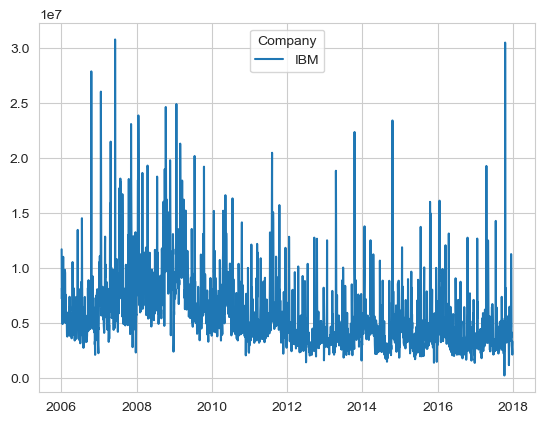

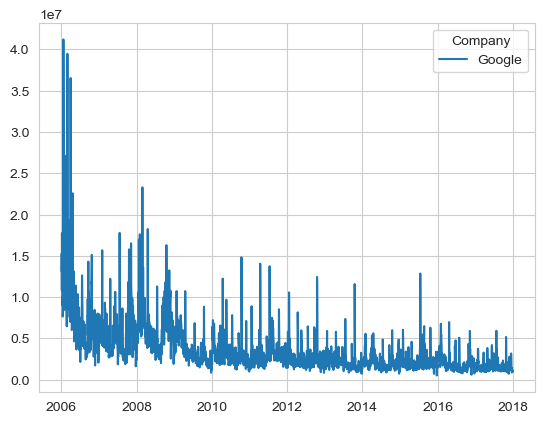

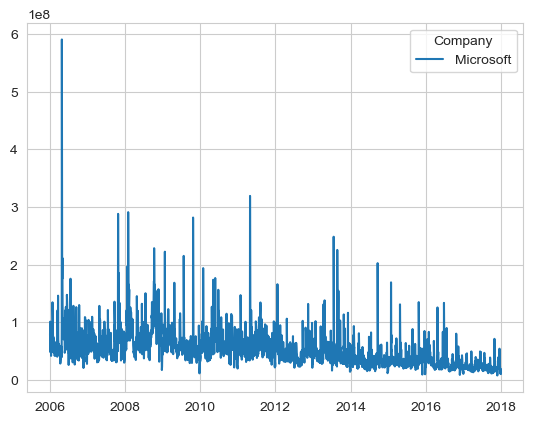

In [37]:
# Stock volume variation over time

list2 = ["Date_Amazon", "Date_IBM", "Date_Google", "Date_Microsoft"]
list3 = ["Amazon", "IBM", "Google", "Microsoft"]

for l in list2:
    df[l] = pd.to_datetime(df[l], errors="coerce")
for l, d, c in zip(list, list2, list3):
    plt.plot(df[d], df[l], label=c)
    plt.legend(title="Company")
    plt.grid(True)
    plt.show()

#### **1.2.2** <font color =red> [3 marks] </font>
Analyse correlations between features.

                  Date_Amazon  Open_Amazon  High_Amazon  Low_Amazon  \
Date_Amazon          1.000000     0.440953     0.441328    0.440672   
Open_Amazon          0.440953     1.000000     0.999931    0.999896   
High_Amazon          0.441328     0.999931     1.000000    0.999889   
Low_Amazon           0.440672     0.999896     0.999889    1.000000   
Close_Amazon         0.441009     0.999833     0.999923    0.999930   
Volume_Amazon       -0.200935    -0.327718    -0.325821   -0.329444   
Date_Google          1.000000     0.440953     0.441328    0.440672   
Open_Google          0.445404     0.972680     0.972805    0.972359   
High_Google          0.445378     0.972537     0.972745    0.972255   
Low_Google           0.445568     0.973023     0.973185    0.972864   
Close_Google         0.445488     0.972763     0.972985    0.972602   
Volume_Google       -0.294981    -0.440651    -0.440640   -0.441373   
Date_IBM             0.467196     0.890795     0.891553    0.890228   
Open_I

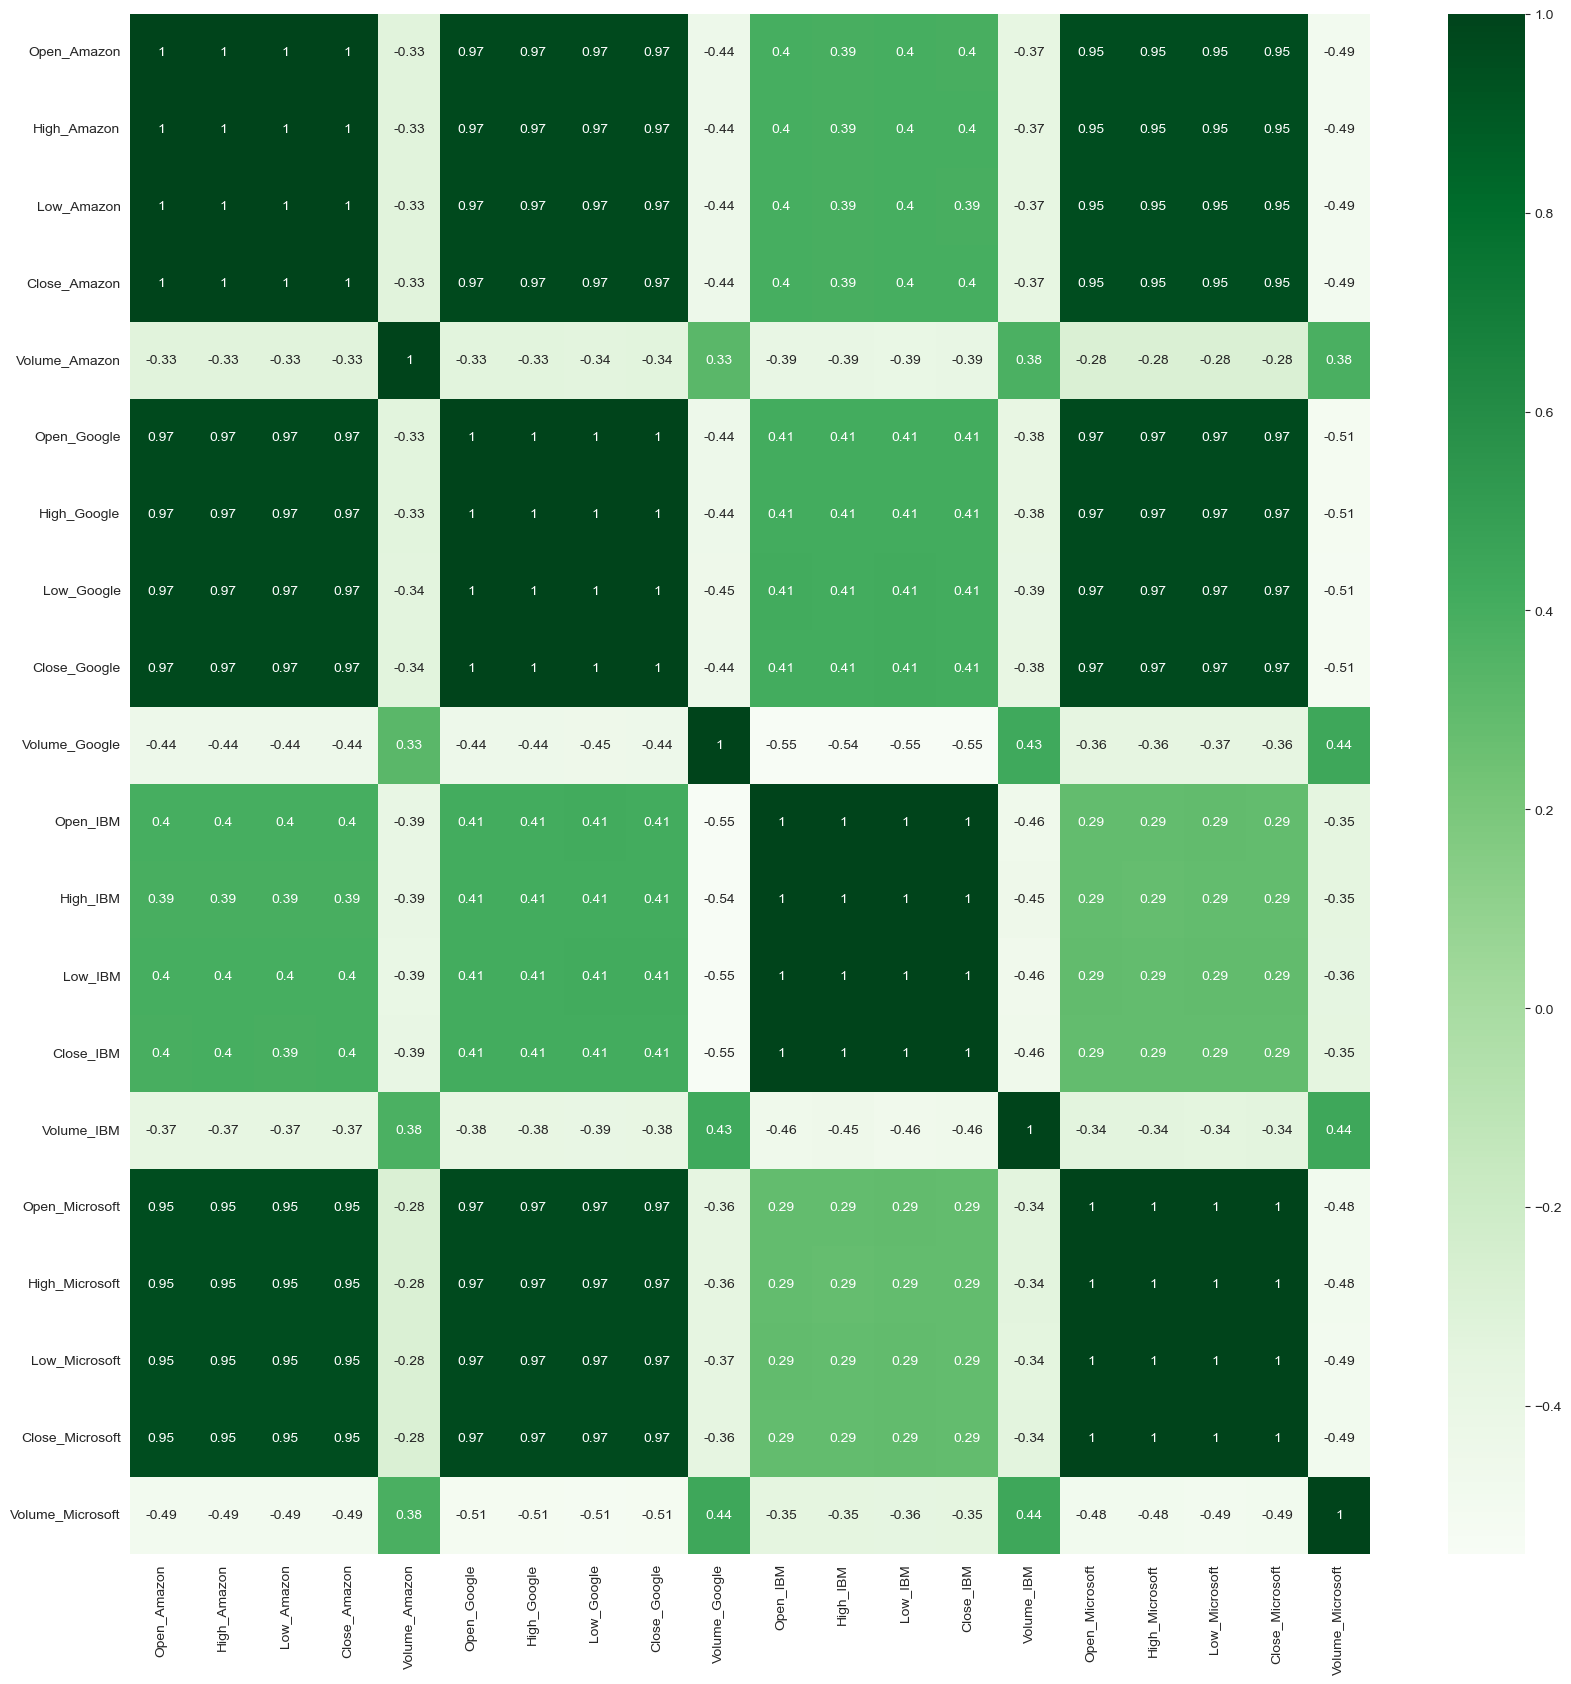

In [38]:
# Analyse correlations
print(df.corr())
list = df.columns
list = list.drop(list2)
print(list)
plt.figure(figsize=(20, 20))
sns.heatmap(df[list].corr(), cmap="Greens", annot=True)
plt.show()

### **1.3 Data Processing** <font color =red> [13 marks] </font>

Next, we need to process the data so that it is ready to be used in recurrent neural networks. You know RNNs are suitable to work with sequential data where patterns repeat at regular intervals.

For this, we need to execute the following steps:
1. Create windows from the master data frame and obtain windowed `X` and corresponding windowed `y` values
2. Perform train-test split on the windowed data
3. Scale the data sets in an appropriate manner

We will define functions for the above steps that finally return training and testing data sets that are ready to be used in recurrent neural networks.

**Hint:** If we use a window of size 3, in the first window, the rows `[0, 1, 2]` will be present and will be used to predict the value of `CloseAMZN` in row `3`. In the second window, rows `[1, 2, 3]` will be used to predict `CloseAMZN` in row `4`.

#### **1.3.1** <font color =red> [3 marks] </font>
Create a function that returns the windowed `X` and `y` data.

From the main DataFrame, this function will create windowed DataFrames, and store those as a list of DataFrames.

Controllable parameters will be window size, step size (window stride length) and target names as a list of the names of stocks whose closing values we wish to predict.

In [39]:
# Define a function that divides the data into windows and generates target variable values for each window
list_of_dfs = []
list3 = ["Close_Amazon", "Close_Google", "Close_IBM", "Close_Microsoft"]
df5 = df.drop(list2, axis=1)


def func(df, window_size, step_size):
    features = []
    targets = []
    list = df.columns
    list = list.drop(list3)
    for i in range(0, df.shape[0] - window_size + 1, step_size):
        df1 = df.iloc[i : i + window_size]
        features.append(df1[list])
        targets.append(df1[list3])
    return np.array(features), np.array(targets)


X, y = func(df5, 3, 1)
print(len(X))
print(len(y))

3018
3018


#### **1.3.2** <font color =red> [3 marks] </font>
Create a function to scale the data.

Define a function that will scale the data.

For scaling, we have to look at the whole length of data to find max/min values or standard deviations and means. If we scale the whole data at once, this will lead to data leakage in the windows. This is not necessarily a problem if the model is trained on the complete data with cross-validation.

One way to scale when dealing with windowed data is to use the `partial_fit()` method.
```
scaler.partial_fit(window)
scaler.transform(window)
```
You may use any other suitable way to scale the data properly. Arrive at a reasonable way to scale your data.

In [40]:
# Define a function that scales the windowed data
# The function takes in the windowed data sets and returns the scaled windows
from sklearn.preprocessing import MinMaxScaler


# scaled_windows = []
def scaled_window(X, y):
    scaler = MinMaxScaler()
    scaled_X = []
    scaled_y = []
    for l in X:
        scaler.partial_fit(l)
        scaled_X.append(scaler.transform(l))
    scaler = MinMaxScaler()
    for l in y:
        scaler.partial_fit(l)
        scaled_y.append(scaler.transform(l))
    return scaled_X, scaled_y


X, y = scaled_window(X, y)


X, y = scaled_window(X, y)

Next, define the main function that will call the windowing and scaling helper functions.

The input parameters for this function are:
- The joined master data set
- The names of the stocks that we wish to predict the *Close* prices for
- The window size
- The window stride
- The train-test split ratio

The outputs from this function are the scaled dataframes:
- *X_train*
- *y_train*
- *X_test*
- *y_test*

#### **1.3.3** <font color =red> [3 marks] </font>
Define a function to create windows of `window_size` and split the windowed data in to training and validation sets.

The function can take arguments such as list of target names, window size, window stride and split ratio. Use the windowing function here to make windows in the data and then perform scaling and train-test split.

In [41]:
# Define a function to create input and output data points from the master DataFrame
from sklearn.model_selection import train_test_split


def func_train_test(X, y):
    X_train, X_validation, y_train, y_validation = train_test_split(
        X, y, train_size=0.7, random_state=42
    )
    X_test, X_validation, y_test, y_validation = train_test_split(
        X_validation, y_validation, test_size=0.5, random_state=42
    )
    return X_train, y_train, X_test, X_validation, y_test, y_validation


X_train, y_train, X_test, X_validation, y_test, y_validation = func_train_test(X, y)

We can now use these helper functions to create our training and testing data sets. But first we need to decide on a length of windows. As we are doing time series prediction, we want to pick a sequence that shows some repetition of patterns.

For selecting a good sequence length, some business understanding will help us. In financial scenarios, we can either work with business days, weeks (which comprise of 5 working days), months, or quarters (comprising of 13 business weeks). Try looking for some patterns for these periods.

#### **1.3.4** <font color =red> [2 marks] </font>
Identify an appropriate window size.

For this, you can use plots to see how target variable is varying with time. Try dividing it into parts by weeks/months/quarters.

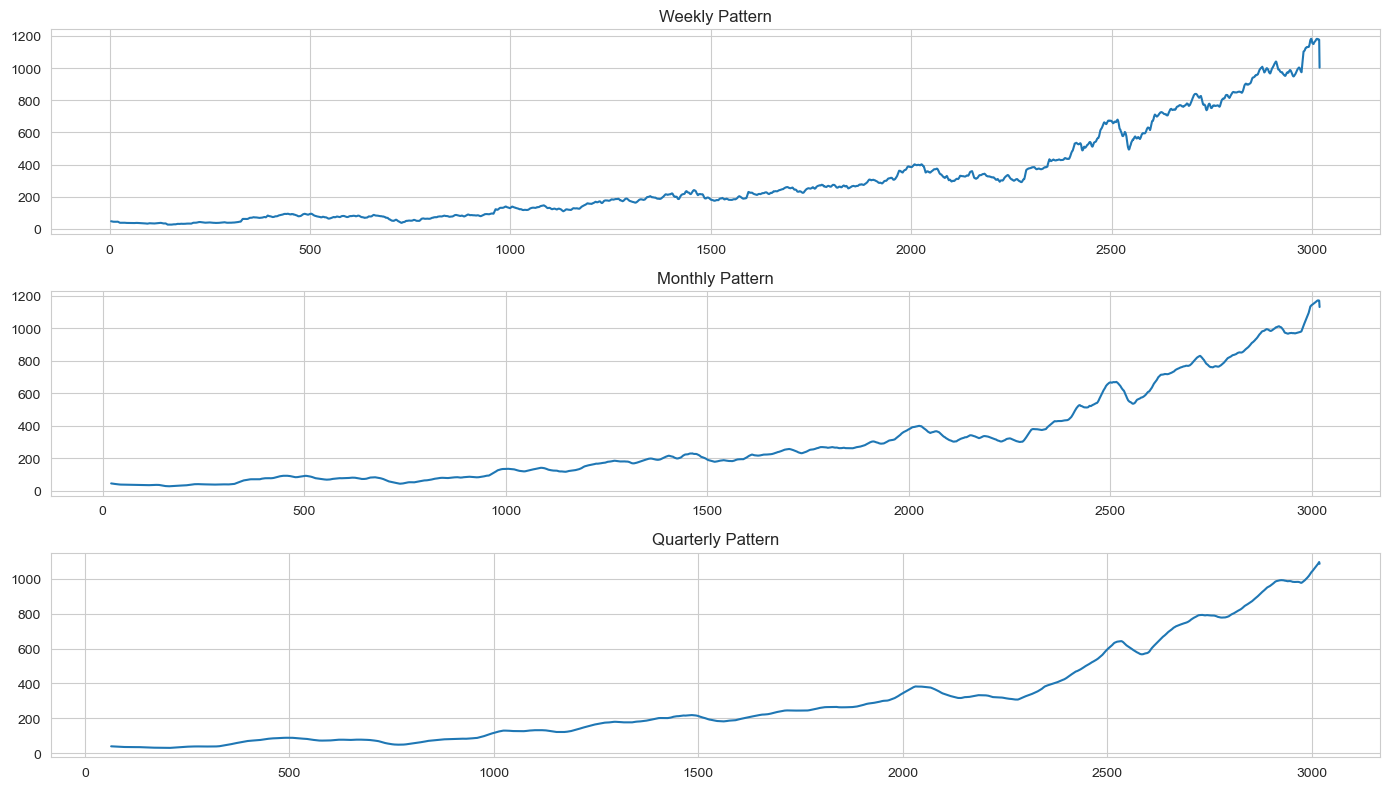

In [42]:
# Checking for patterns in different sequence lengths
def plot_window_patterns(df, column="Close"):
    plt.figure(figsize=(14, 8))
    plt.subplot(3, 1, 1)  # for week = business days
    df[column].rolling(window=5).mean().plot(title="Weekly Pattern")
    plt.subplot(3, 1, 2)  # for month = business days
    df[column].rolling(window=22).mean().plot(title="Monthly Pattern")
    plt.subplot(3, 1, 3)  # fro quarter = business days
    df[column].rolling(window=65).mean().plot(title="Quarterly Pattern")
    plt.tight_layout()
    plt.show()


plot_window_patterns(df, column="Close_Amazon")

#### **1.3.5** <font color =red> [2 marks] </font>
Call the functions to create testing and training instances of predictor and target features.

In [43]:
# Create data instances from the master data frame using decided window size and window stride
def sequence(data, target_col="Close_Amazon", window_size=22, stride=1):
    X, y = [], []
    target = data[target_col].values
    for i in range(0, len(target) - window_size, stride):
        X.append(target[i : i + window_size])
        y.append(target[i + window_size])
    return np.array(X), np.array(y)

In [44]:
# Check the number of data points generated
X, y = sequence(df, target_col="Close_Amazon", window_size=22, stride=1)
print("Number of samples:", X.shape[0])
print("Window length:", X.shape[1])
print("Number of target variables:", y.shape[0])

Number of samples: 2998
Window length: 22
Number of target variables: 2998


**Check if the training and testing datasets are in the proper format to feed into neural networks.**

In [45]:
# Check if the datasets are compatible inputs to neural networks
X_train = np.array(X_train)
X_validation = np.array(X_validation)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_validation = np.array(y_validation)
y_test = np.array(y_test)
print(X_train.shape)
# X_train = X_train.reshape(-1, X_train.shape[2])
# X_validation = X_validation.reshape(-1, X_validation.shape[2])
# X_test = X_test.reshape(-1, X_test.shape[2])
# y_train = y_train.reshape(-1, y_train.shape[2])
# y_validation = y_validation.reshape(-1, y_validation.shape[2])
#
# y_test = y_test.reshape(-1, y_test.shape[2])
# print(X_train.shape)

# print(y_test)
# print('TEST')
# print(y_train)
# print('TRAIN')
# print(y_validation)
# print('VALIDATION')

(2112, 3, 16)


## **2 RNN Models** <font color =red> [20 marks] </font>

In this section, we will:
- Define a function that creates a simple RNN
- Tune the RNN for different hyperparameter values
- View the performance of the optimal model on the test data

### **2.1 Simple RNN Model** <font color =red> [10 marks] </font>

#### **2.1.1** <font color =red> [3 marks] </font>
Create a function that builds a simple RNN model based on the layer configuration provided.

In [46]:
# Create a function that creates a simple RNN model according to the model configuration arguments
print(X_train.shape)
print(y_train.shape)
from tensorflow import keras
from tensorflow.keras import Sequential

model = Sequential()
shape1 = X_train.shape[1]
model.add(
    tf.keras.layers.SimpleRNN(
        128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True
    )
)
model.add(keras.layers.SimpleRNN(64, return_sequences=True))
model.add(keras.layers.SimpleRNN(64, return_sequences=True))
model.add((keras.layers.Dense(y_train.shape[2], activation="linear")))
model.compile(loss="mean_squared_error", optimizer="adam", metrics=["MSE"])
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor="val_MSE", patience=5, restore_best_weights=True, mode="min"
)

(2112, 3, 16)
(2112, 3, 4)


C:\Users\ak007\anaconda4\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


#### **2.1.2** <font color =red> [4 marks] </font>
Perform hyperparameter tuning to find the optimal network configuration.

In [47]:
# Find an optimal configuration of simple RNN
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_5 (SimpleRNN)        │ (None, 3, 128)         │        18,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_6 (SimpleRNN)        │ (None, 3, 64)          │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_7 (SimpleRNN)        │ (None, 3, 64)          │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3, 4)           │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,428 (154.02 KB)

 Trainable params: 39,428 (154.02 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
# Find the best configuration based on evaluation metrics
rnn_training = model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=50,
    callbacks=[early_stopping],
    validation_data=(X_validation, y_validation),
    verbose=1,
)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - MSE: 0.0508 - loss: 0.0508 - val_MSE: 0.0059 - val_loss: 0.0059
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - MSE: 0.0037 - loss: 0.0037 - val_MSE: 0.0027 - val_loss: 0.0027
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - MSE: 0.0021 - loss: 0.0021 - val_MSE: 0.0022 - val_loss: 0.0022
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - MSE: 0.0015 - loss: 0.0015 - val_MSE: 0.0017 - val_loss: 0.0017
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - MSE: 0.0013 - loss: 0.0013 - val_MSE: 0.0015 - val_loss: 0.0015
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - MSE: 0.0011 - loss: 0.0011 - val_MSE: 0.0014 - val_loss: 0.0014
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - MSE: 0.0011 - loss: 0.0011 - val_MSE: 0.0014 - val_loss: 0.0014
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - MSE: 0.0010 - loss: 0.0010 - val_MSE: 0.0013 - val_loss: 0.0013
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - MSE: 9.5929e-04 - lo

#### **2.1.3** <font color =red> [3 marks] </font>
Run for optimal Simple RNN Model and show final results.

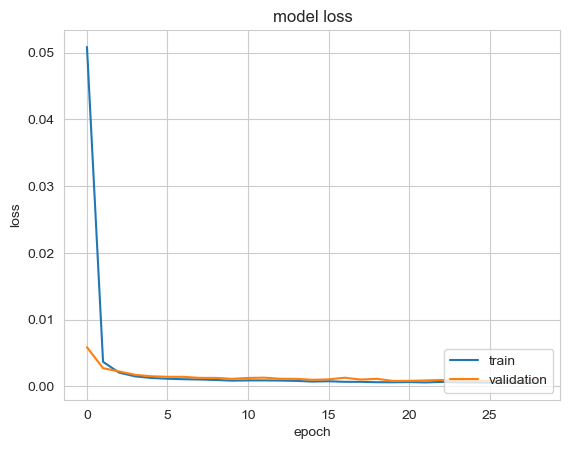

In [49]:
# Create an RNN model with a combination of potentially optimal hyperparameter values and retrain the model

plt.plot(rnn_training.history["loss"])
plt.plot(rnn_training.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc="lower right")
plt.show()

Plotting the actual vs predicted values

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[[[0.9028354  0.74712723 0.862061   0.6482252 ]
  [0.89156145 0.7420228  0.86812985 0.66345185]
  [0.8986261  0.7447631  0.8771444  0.6469327 ]]

 [[0.74022037 0.5355513  0.9346655  0.41280243]
  [0.7178547  0.5178226  0.90249497 0.39946383]
  [0.71045953 0.5376835  0.9093907  0.38838723]]

 [[0.89278096 0.6946135  0.8626404  0.679299  ]
  [0.8855892  0.66272575 0.85389465 0.67575556]
  [0.8636083  0.6518346  0.8305853  0.6371464 ]]

 ...

 [[0.97788054 0.96872497 0.7534776  0.9787966 ]
  [0.98778945 0.9856484  0.7438999  1.0079076 ]
  [0.9888521  0.99926865 0.74094284 0.98807967]]

 [[0.97786456 0.9693699  0.714616   0.918854  ]
  [0.9807677  0.9791177  0.7286592  0.94464463]
  [0.9916249  0.98732704 0.733234   0.8964755 ]]

 [[0.8591445  0.63310707 0.8491764  0.45512518]
  [0.872327   0.62761533 0.82853436 0.47377253]
  [0.89322907 0.61834365 0.8476753  0.4406291 ]]]


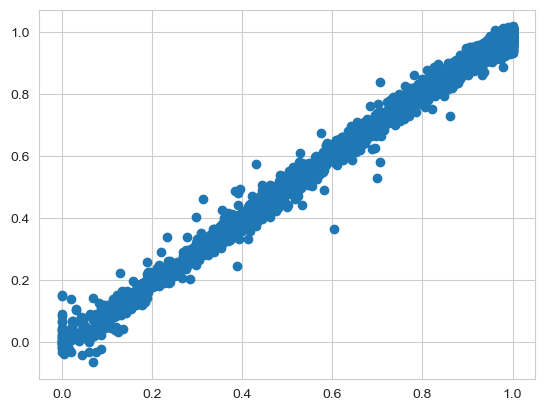

In [50]:
# Predict on the test data and plot
y_pred = model.predict(X_test)
print(y_pred)
plt.scatter(x=y_test, y=y_pred)
plt.show()

It is worth noting that every training session for a neural network is unique. So, the results may vary slightly each time you retrain the model.

In [51]:
# Compute the performance of the model on the testing data set
y_test1 = y_test.copy().reshape(-1, y_test.shape[2])
y_pred1 = y_pred.copy().reshape(-1, y_pred.shape[2])
from sklearn.metrics import r2_score

print(r2_score(y_test1, y_pred1))

0.9928047158474618


### **2.2 Advanced RNN Models** <font color =red> [10 marks] </font>

In this section, we will:
- Create an LSTM or a GRU network
- Tune the network for different hyperparameter values
- View the performance of the optimal model on the test data

#### **2.2.1** <font color =red> [3 marks] </font>
Create a function that builds an advanced RNN model with tunable hyperparameters.

In [52]:
# # Define a function to create a model and specify default values for hyperparameters
from tensorflow import keras
from tensorflow.keras import Sequential

model = Sequential()
shape1 = X_train.shape[1]
model.add(
    tf.keras.layers.LSTM(
        128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True
    )
)
model.add(keras.layers.LSTM(64, return_sequences=True))
model.add(keras.layers.LSTM(64, return_sequences=True))
model.add((keras.layers.Dense(y_train.shape[2], activation="linear")))
model.compile(loss="mean_squared_error", optimizer="adam", metrics=["MSE"])
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor="val_MSE", patience=5, restore_best_weights=True, mode="min"
)

C:\Users\ak007\anaconda4\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


#### **2.2.2** <font color =red> [4 marks] </font>
Perform hyperparameter tuning to find the optimal network configuration.

In [53]:
# Find an optimal configuration
print(model.summary())
lstm_training = model.fit(
    X_train,
    y_train,
    epochs=200,
    batch_size=32,
    callbacks=[early_stopping],
    validation_data=(X_validation, y_validation),
    verbose=1,
)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 3, 128)         │        74,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 3, 64)          │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 3, 64)          │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3, 4)           │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 156,932 (613.02 KB)

 Trainable params: 156,932 (613.02 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - MSE: 0.2147 - loss: 0.2147 - val_MSE: 0.0536 - val_loss: 0.0536
Epoch 2/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - MSE: 0.0272 - loss: 0.0272 - val_MSE: 0.0162 - val_loss: 0.0162
Epoch 3/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - MSE: 0.0125 - loss: 0.0125 - val_MSE: 0.0111 - val_loss: 0.0111
Epoch 4/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - MSE: 0.0081 - loss: 0.0081 - val_MSE: 0.0065 - val_loss: 0.0065
Epoch 5/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - MSE: 0.0050 - loss: 0.0050 - val_MSE: 0.0047 - val_loss: 0.0047
Epoch 6/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - MSE: 0.0042 - loss: 0.0042 - val_MSE: 0.0041 - val_loss: 0.0041
Epoch 7/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - MSE: 0.0037 - loss: 0.0037 - val_MSE: 0.0034 - val_loss: 0.0034
Epoch 8/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - MSE: 0.0031 - loss: 0.0031 - val_MSE: 0.0031 - val_loss: 0.0031
Epoch 9/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - MSE: 

#### **2.2.3** <font color =red> [3 marks] </font>
Run for optimal RNN Model and show final results.

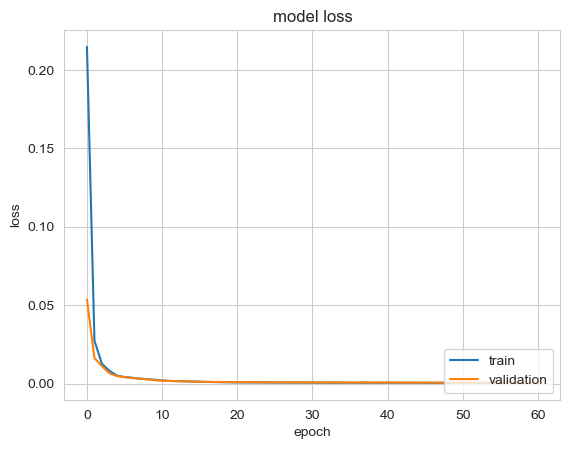

In [54]:
# Create the model with a combination of potentially optimal hyperparameter values and retrain the model

plt.plot(lstm_training.history["loss"])
plt.plot(lstm_training.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc="lower right")
plt.show()

In [55]:
# Compute the performance of the model on the testing data set
y_pred2 = model.predict(X_test)
y_test2 = y_test.copy().reshape(-1, y_test.shape[2])
y_pred2 = y_pred2.copy().reshape(-1, y_pred2.shape[2])
from sklearn.metrics import r2_score

print(r2_score(y_test2, y_pred2))

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step
0.9934759742627383


Plotting the actual vs predicted values

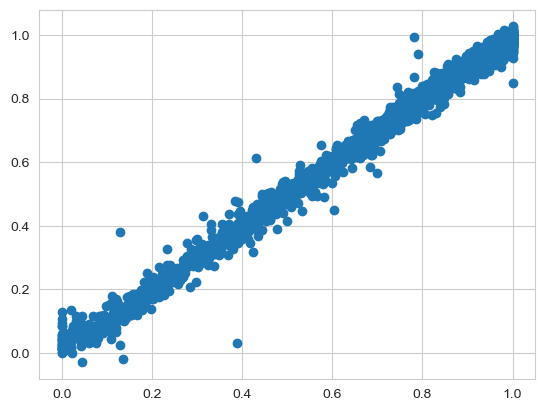

In [56]:
# Predict on the test data
plt.scatter(y_test2, y_pred2)
plt.show()

## **3 Predicting Multiple Target Variables** <font color =red> [OPTIONAL] </font>

In this section, we will use recurrent neural networks to predict stock prices for more than one company.

### **3.1 Data Preparation**

#### **3.1.1**
Create testing and training instances for multiple target features.

You can take the closing price of all four companies to predict here.

In [57]:
# Create data instances from the master data frame using a window size of 65, a window stride of 5 and a test size of 20%
def multiple_target_sequence(data, target_names, window_size=65, stride=5):
    X, y = [], []
    target_data = data[target_names].values  # multi-target (2D)
    for i in range(0, len(target_data) - window_size, stride):
        X.append(target_data[i : i + window_size])
        y.append(target_data[i + window_size])
    return np.array(X), np.array(y)


# Specify the list of stock names whose 'Close' values you wish to predict using the 'target_names' parameter
target_variables = ["Close_Amazon", "Close_Google", "Close_IBM", "Close_Microsoft"]
X, y = multiple_target_sequence(df, target_variables, window_size=65, stride=5)
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (591, 65, 4)
Shape of y: (591, 4)


In [58]:
# Check the number of data points generated
print("Number of samples:", X.shape[0])
print("Window length:", X.shape[1])
print("Number of features per day:", X.shape[2])
print("Number of target points:", y.shape[0])
print("Targets per sample:", y.shape[1])

Number of samples: 591
Window length: 65
Number of features per day: 4
Number of target points: 591
Targets per sample: 4


In [59]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False  # don't shuffle time series
)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(472, 65, 4)
(472, 4)
(119, 65, 4)
(119, 4)


### **3.2 Run RNN Models**

#### **3.2.1**
Perform hyperparameter tuning to find the optimal network configuration for Simple RNN model.

In [60]:
# Find an optimal configuration of simple RNN
cut = int(0.9 * len(X_train))
X_train_set, X_val = X_train[:cut], X_train[cut:]
y_train_set, y_val = y_train[:cut], y_train[cut:]
timesteps = X_train_set.shape[1]
y_trrain_set_seq = np.repeat(y_train_set[:, None, :], timesteps, axis=1)
y_val_seq = np.repeat(y_val[:, None, :], timesteps, axis=1)
model = Sequential()
model.add(keras.layers.Input((X_train.shape[1], X_train.shape[2])))
model.add(keras.layers.SimpleRNN(64, return_sequences=True))
model.add(keras.layers.SimpleRNN(64, return_sequences=True))
model.add(keras.layers.TimeDistributed(keras.layers.Dense(y_dim, activation="linear")))
model.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor="val_mse", patience=5, restore_best_weights=True, mode="min"
)

NameError: name 'y_dim' is not defined

In [ ]:
# Find the best configuration
print(model.summary())
rnn_training = model.fit(
    X_train,
    y_train_seq,
    epochs=200,
    batch_size=32,
    callbacks=[early_stopping],
    validation_data=(X_val, y_val_seq),
    shuffle=False,
    verbose=1,
)

In [ ]:
# Create an RNN model with a combination of potentially optimal hyperparameter values and retrain the model

In [ ]:
# Compute the performance of the model on the testing data set

In [ ]:
# Plotting the actual vs predicted values for all targets

#### **3.2.2**
Perform hyperparameter tuning to find the optimal network configuration for Advanced RNN model.

In [ ]:
# Find an optimal configuration of advanced RNN

In [ ]:
# Find the best configuration

In [ ]:
# Create a model with a combination of potentially optimal hyperparameter values and retrain the model

In [ ]:
# Compute the performance of the model on the testing data set

In [ ]:
# Plotting the actual vs predicted values for all targets

## **4 Conclusion** <font color =red> [5 marks] </font>

### **4.1 Conclusion and insights** <font color =red> [5 marks] </font>

#### **4.1.1** <font color =red> [5 marks] </font>
Conclude with the insights drawn and final outcomes and results.

We used daily price data from 2006–2018 to predict the next day’s Close for one stock.
A 65-day window was considered which is about one quarter in business days. This worked best as it was enough to capture real trends and avoid overfitting whiche was sseen in the other windows considered like 5 business days (weekly) and 22 business days (monthly) windows.
We split the data in standard 80-20 split and used the cut-off of 10% of train for validation. A 2-layer SimpleRNN with Adam, MSE and EarlyStopping was used to stop the training at the right time and avoid overfitting of the model.
After the validation, we see that the model follows general stock permormance trend (up and down) trends but is somewhat difficult for it to perform well around any new news or sudden jumps. This makes it hard to predict from past data.